# Telecom Customer Churn Prediction

Customer Churn is a major problem and one of the most crucial challenges that companies have
to deal with due to its direct impact on the revenues and market share. It is a very well known fact that
acquiring a new customer is more expensive than retaining the existing customers. Therefore this will
help us to determine customer retention success rates and identify strategies for improvement.

<div>
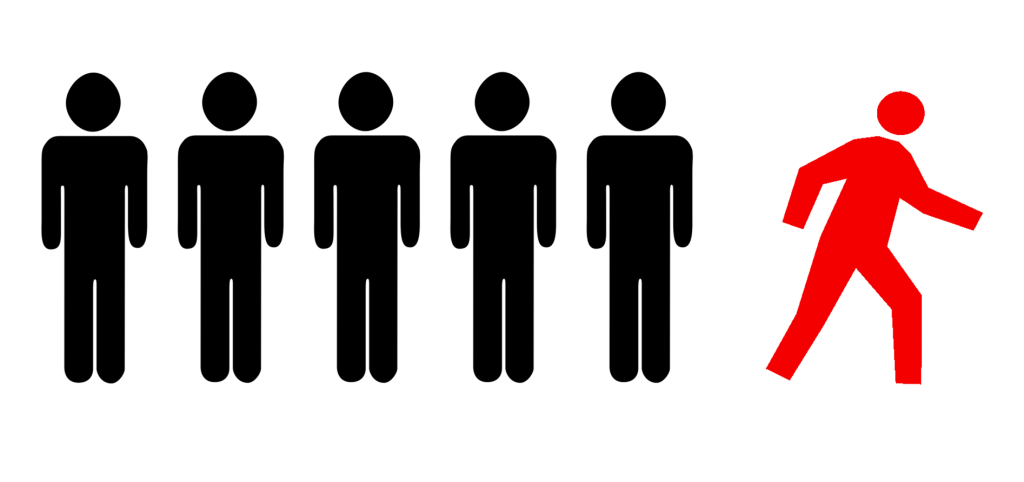
</div>

Goal: Predict if a customer will churn or not. Thereby, business can take corrective actions to retain those customers who might churn

Dataset Reference:
https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

<div class="alert alert-block alert-info">
<b>PREREQUISITES STATED ARE MET :</b> 
    
* At least 15 features (columns) - This dataset has 21 columns ie., >15 pre and post processing as well
* At least 1000 instances (rows) - This dataset has around ~2000 instances ie., >1000 pre and post processing as well
* At least two categorical/ordinal columns - This dataset has >2 categorical columns
* Between 5 to 10 percent missing values across the dataset - Have randomly ingested 5% nulls across 5 columns </div>

<div class="alert alert-block alert-info">
    <b>EVALUATION STRATEGY JUSTIFICATION:</b>
    
Based on the impact, I have chosen <b>Recall score</b> as the primary evaluation criterion since we got to control False Negatives as much as possible. Customers who might possibly churn should be predicted correctly so that business can take corrective actions not to lose those customers in future. In addition, as this is not a well-balanced dataset (70:30 churn ratio), roc_auc_score is considered as a supporting score. This dataset is not imbalanced to use roc_auc score  primarily and thus am using recall_score as primary and roc_auc_score as the supporting score. </div>

In [108]:
#Import all required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Data Analysis

Lets start the analysis with imports of some basic libraries which includes Pandas and Numpy for data handling and processing. Data set (.csv format) is downloaded to a local folder, read into the Jupyter notebook and stored in a Pandas DataFrame.

In [109]:
# Import dataset using pandas reader
df = pd.read_csv('Customer-Churn.csv')

In [110]:
# General statistics
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,1999.000000,1999.000000,1999.000000
mean,0.159080,32.343172,65.318459
std,0.365842,24.601820,29.823159
min,0.000000,0.000000,18.400000
25%,0.000000,9.000000,39.850000
50%,0.000000,29.000000,70.900000
75%,0.000000,56.000000,89.850000
max,1.000000,72.000000,116.450000


In [111]:
# Here, Churn is the target variable and there are many categorical columns which has to be transformed into numerical 
# columns and nulls in the dataset has to be handled as well for modelling
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1999 non-null   object 
 1   gender            1999 non-null   object 
 2   SeniorCitizen     1999 non-null   int64  
 3   Partner           1999 non-null   object 
 4   Dependents        1572 non-null   object 
 5   tenure            1999 non-null   int64  
 6   PhoneService      1386 non-null   object 
 7   MultipleLines     1999 non-null   object 
 8   InternetService   1999 non-null   object 
 9   OnlineSecurity    1582 non-null   object 
 10  OnlineBackup      1999 non-null   object 
 11  DeviceProtection  1999 non-null   object 
 12  TechSupport       1604 non-null   object 
 13  StreamingTV       1999 non-null   object 
 14  StreamingMovies   1999 non-null   object 
 15  Contract          1999 non-null   object 
 16  PaperlessBilling  1693 non-null   object 


In [112]:
# Total nulls in the dataset
df.isnull().sum().sum()

2158

In [113]:
# Percentage of nulls in the dataset is around 5.14%
(df.isnull().sum().sum()/ (df.shape[0] * df.shape[1]) ) * 100

5.140665570880679

In [114]:
# Dataset has 1999 rows and 21 columns
df.shape

(1999, 21)

In [115]:
# Sample records of the dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,NaN,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,NaN,No,No,Month-to-month,NaN,Electronic check,70.70,151.65,Yes



### Check for Duplicates

In [116]:
# There are no duplicates to be dropped
sum(df.duplicated())

0

Churn Percentages are
 No     0.737369
Yes    0.262631
Name: Churn, dtype: float64


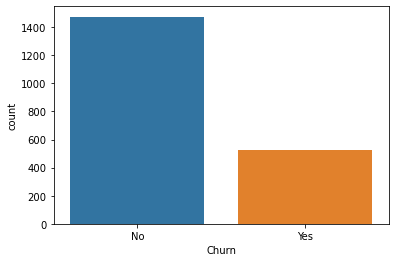

In [117]:
# From below there is only 26% Churn in the whole dataset. From this we can infer that, its not a well-balanced dataset.
# As this is an not a well-balanced data, roc_auc_score is considered as a supporting score with recall score as primary
import seaborn as sns
sns.countplot(df.Churn);
print ('Churn Percentages are\n',df.Churn.value_counts() / df.Churn.count())

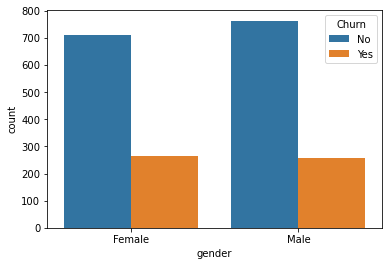

In [118]:
# From below countplot we can infer that Gender doesnt seem to play a crucial role in churn
sns.countplot(x='gender', hue='Churn', data=df);

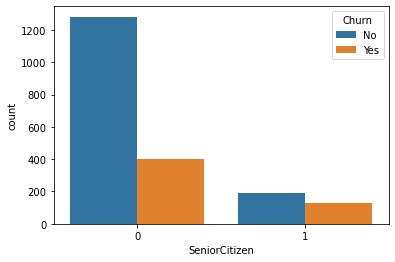

In [119]:
# From below countplot we can infer that SeniorCitizen has a greater churn rate compared with non-senior citizen
sns.countplot(x='SeniorCitizen', hue='Churn', data=df);

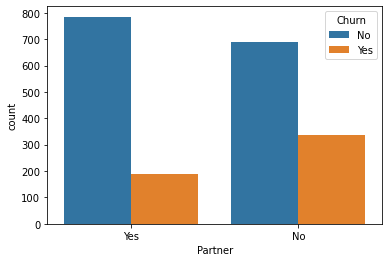

In [120]:
# From below countplot we can infer that customers without partners tend to churn away from the carrier
sns.countplot(x='Partner', hue='Churn', data=df);

<AxesSubplot:xlabel='tenure', ylabel='Count'>

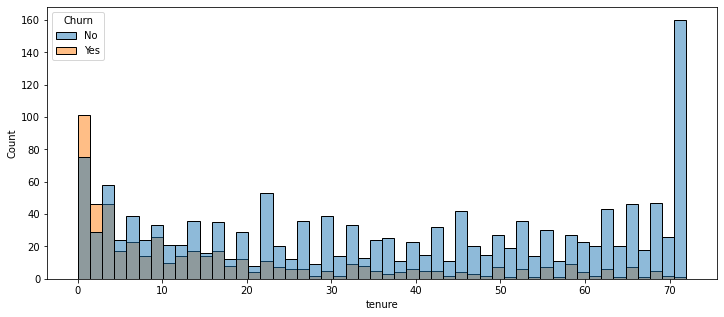

In [121]:
plt.figure(figsize=(12,5))
# Greater number of churns has happened with new customer
sns.histplot(x='tenure', hue='Churn', data=df, bins=50)

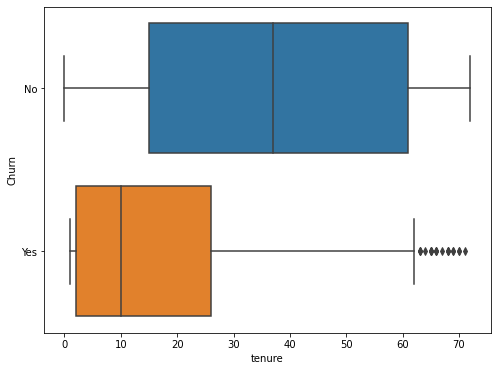

In [122]:
plt.figure(figsize=(8,6))
sns.boxplot(x='tenure', y='Churn',data=df);

### Outliers Handling

From above plot we can infer that, 
* Most of the churned customers are between tenure of 5 months and 25 months
* There are some outliers in churned cutomers ie Customers who are regular/ premium customers with >65 months enrolled with this telco carrier who had left away from the carrier. As these outliers are important for our modelling since business might be interested in churn rate of premium customers more, hence I have decided not to drop these outliers

## Data Cleaning

Goal of this step is to get an understanding of the data structure, conduct initial preprocessing, clean the data, identify patterns and inconsistencies in the data (i.e. skewness, outliers, missing values), build and validate hypotheses.

<b>Steps:</b>
* All categorical columns have been transformed to numerical columns based on,
    * Values in a binomial column to be mapped to 0 and 1 with the most frequent class mapped as 1 and the other as 0 
    * Ordinal values to be mapped to ordinal numerical values starting at 0 based on the logical order
    * Non-ordinal categorical columns to be replaced with a one-hot vector
* Null value imputation or dropping of nulls on need basis
* Duplicates handling
* Dropping of regressors which are not required for modelling

In [123]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,NaN,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,NaN,No,No,Month-to-month,NaN,Electronic check,70.70,151.65,Yes


In [124]:
df['gender'].value_counts()

Male      1023
Female     976
Name: gender, dtype: int64

In [125]:
# Binomial column: Mapping 1 to the most frequent class of gender ie., Male
df['gender'] = df['gender'].map({'Male':1, 'Female':0}).astype(int)

In [126]:
df['Partner'].value_counts()

No     1026
Yes     973
Name: Partner, dtype: int64

In [127]:
# Binomial column: Assigning 1 to the most frequent class of Partner ie., No
df['Partner'] = df['Partner'].map({'No':1, 'Yes':0}).astype(int)

In [128]:
df['Dependents'].value_counts(dropna=False)

No     956
Yes    616
NaN    427
Name: Dependents, dtype: int64

In [129]:
# Replacing nulls with the most frequent value
df['Dependents'].replace(np.NaN, df.Dependents.mode()[0], inplace=True)

In [130]:
df['Dependents'].value_counts(dropna=False)

No     1383
Yes     616
Name: Dependents, dtype: int64

In [131]:
# Assigning 1 to the most frequent class of Dependents ie., No
df['Dependents'] = df['Dependents'].map({'No':1, 'Yes':0}).astype(int,errors='ignore')

In [132]:
df['PhoneService'].value_counts(dropna=False)

Yes    1210
NaN     613
No      176
Name: PhoneService, dtype: int64

In [133]:
# Replacing nulls with the most frequent value
df['PhoneService'].replace(np.NaN,df.PhoneService.mode()[0],inplace=True)

In [134]:
df['PhoneService'].value_counts(dropna=False)

Yes    1823
No      176
Name: PhoneService, dtype: int64

In [135]:
# Assigning 1 to the most frequent class of PhoneService ie., Yes
df['PhoneService'] = df['PhoneService'].map({'Yes':1, 'No':0}).astype(int,errors='ignore')

In [136]:
df['MultipleLines'].value_counts()

No                  963
Yes                 860
No phone service    176
Name: MultipleLines, dtype: int64

In [137]:
# Create one-hot vector since its a non-ordinal categorical column
cols = pd.get_dummies(df['MultipleLines'], prefix= 'MultipleLines')
df[cols.columns] = cols
df.drop('MultipleLines', axis = 1, inplace = True)

In [138]:
df['InternetService'].value_counts()

Fiber optic    897
DSL            676
No             426
Name: InternetService, dtype: int64

In [139]:
# Create one-hot vector since its a non-ordinal categorical column
cols = pd.get_dummies(df['InternetService'], prefix= 'InternetService')
df[cols.columns] = cols
df.drop('InternetService', axis = 1, inplace = True)

In [140]:
df['OnlineSecurity'].value_counts(dropna=False)

No                     594
Yes                    562
No internet service    426
NaN                    417
Name: OnlineSecurity, dtype: int64

In [141]:
# Replacing nulls with the most frequent value
df['OnlineSecurity'].replace(np.NaN, df.OnlineSecurity.mode()[0], inplace=True)

In [142]:
df['OnlineSecurity'].value_counts(dropna=False)

No                     1011
Yes                     562
No internet service     426
Name: OnlineSecurity, dtype: int64

In [143]:
# Create one-hot vector since its a non-ordinal categorical column
cols = pd.get_dummies(df['OnlineSecurity'], prefix= 'OnlineSecurity')
df[cols.columns] = cols
df.drop('OnlineSecurity', axis = 1, inplace = True)

In [144]:
df['OnlineBackup'].value_counts()

No                     880
Yes                    693
No internet service    426
Name: OnlineBackup, dtype: int64

In [145]:
# Create one-hot vector since its a non-ordinal categorical column
cols = pd.get_dummies(df['OnlineBackup'], prefix= 'OnlineBackup')
df[cols.columns] = cols
df.drop('OnlineBackup', axis = 1, inplace = True)

In [146]:
df['DeviceProtection'].value_counts()

No                     891
Yes                    682
No internet service    426
Name: DeviceProtection, dtype: int64

In [147]:
# Create one-hot vector since its a non-ordinal categorical column
cols = pd.get_dummies(df['DeviceProtection'], prefix= 'DeviceProtection')
df[cols.columns] = cols
df.drop('DeviceProtection', axis = 1, inplace = True)

In [148]:
df['TechSupport'].value_counts(dropna=False)

No                     611
Yes                    567
No internet service    426
NaN                    395
Name: TechSupport, dtype: int64

In [149]:
# Replacing nulls with the most frequent value
df['TechSupport'].replace(np.NaN, df.TechSupport.mode()[0], inplace=True)

In [150]:
df['TechSupport'].value_counts(dropna=False)

No                     1006
Yes                     567
No internet service     426
Name: TechSupport, dtype: int64

In [151]:
# Create one-hot vector since its a non-ordinal categorical column
cols = pd.get_dummies(df['TechSupport'], prefix= 'TechSupport')
df[cols.columns] = cols
df.drop('TechSupport', axis = 1, inplace = True)

In [152]:
df['StreamingTV'].value_counts()

No                     802
Yes                    771
No internet service    426
Name: StreamingTV, dtype: int64

In [153]:
# Create one-hot vector since its a non-ordinal categorical column
cols = pd.get_dummies(df['StreamingTV'], prefix= 'StreamingTV')
df[cols.columns] = cols
df.drop('StreamingTV', axis = 1, inplace = True)

In [154]:
df['StreamingMovies'].value_counts()

Yes                    788
No                     785
No internet service    426
Name: StreamingMovies, dtype: int64

In [155]:
# Create one-hot vector since its a non-ordinal categorical column
cols = pd.get_dummies(df['StreamingMovies'], prefix= 'StreamingMovies')
df[cols.columns] = cols
df.drop('StreamingMovies', axis = 1, inplace = True)


In [156]:
df['Contract'].value_counts()

Month-to-month    1105
Two year           483
One year           411
Name: Contract, dtype: int64

In [157]:
# Create one-hot vector since its a non-ordinal categorical column
cols = pd.get_dummies(df['Contract'], prefix= 'Contract')
df[cols.columns] = cols
df.drop('Contract', axis = 1, inplace = True)

In [158]:
df['PaperlessBilling'].value_counts(dropna=False)

Yes    894
No     799
NaN    306
Name: PaperlessBilling, dtype: int64

In [159]:
# Replacing nulls with the most frequent value
df['PaperlessBilling'].replace(np.NaN, df.PaperlessBilling.mode()[0], inplace=True)

In [160]:
df['PaperlessBilling'].value_counts(dropna=False)

Yes    1200
No      799
Name: PaperlessBilling, dtype: int64

In [161]:
# Assigning 1 to the most frequent class of PaperlessBilling ie., Yes
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes':1, 'No':0}).astype(int,errors='ignore')

In [162]:
df['PaymentMethod'].value_counts()

Electronic check             655
Bank transfer (automatic)    480
Credit card (automatic)      440
Mailed check                 424
Name: PaymentMethod, dtype: int64

In [163]:
# Create one-hot vector since its a non-ordinal categorical column
cols = pd.get_dummies(df['PaymentMethod'], prefix= 'PaymentMethod')
df[cols.columns] = cols
df.drop('PaymentMethod', axis = 1, inplace = True)

In [164]:
df['Churn'].value_counts()

No     1474
Yes     525
Name: Churn, dtype: int64

In [165]:
# Based on business need, as we are interested in predicting churn, setting Yes as 1 and No as 0
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0}).astype(int)

In [166]:
# Conversion of Total Charges to numeric type with errors as coerce passed so as to replace invalid parsing as NaN
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [167]:
df.shape

(1999, 42)

In [168]:
# Total nulls in the dataset
df.isnull().sum().sum()

5

In [169]:
df = df.dropna()

In [170]:
df.isnull().sum().sum()

0

In [171]:
# CustomerID column is being dropped since it doesnt contribute to the target variable in the generalization function
df.drop(columns=['customerID'], inplace = True)

## Model Selection and Hyperparameter tuning

In [179]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

In [180]:
# Churn is the target column and all other columns are the regressors
X = df.drop(columns = ['Churn'])
y = df['Churn'].values

In [181]:
# 1 here represents the positive label (Churned Customers) and 0 represents negative label (Non-Churned Customers)
y

array([0, 0, 1, ..., 0, 0, 1])

In [182]:
# Post data cleaning and data transformation
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1998
Data columns (total 40 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   1994 non-null   int32  
 1   SeniorCitizen                            1994 non-null   int64  
 2   Partner                                  1994 non-null   int32  
 3   Dependents                               1994 non-null   int32  
 4   tenure                                   1994 non-null   int64  
 5   PhoneService                             1994 non-null   int32  
 6   PaperlessBilling                         1994 non-null   int32  
 7   MonthlyCharges                           1994 non-null   float64
 8   TotalCharges                             1994 non-null   float64
 9   MultipleLines_No                         1994 non-null   uint8  
 10  MultipleLines_No phone service           1994 no

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

<div class="alert alert-block alert-info">
    <b>SCALING JUSTIFICATION:</b>
    
I have chosen <b>Standard Scaler</b> as the scaling criterion since we saw some regular/ premium customers who had a long 
tenure with this telco carrier churn away. I hadnt dropped such outliers since its important for our modelling.
Standard Scaler is chosen since it maintains useful information about outliers and makes the algorithm less sensitive to them
in contrast to min-max scaling</div>

In [184]:
# Using standard scaler to scale the data 
Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.fit_transform(X_test)

### 1. KNN classification

In [210]:
# Since this dataset has ~2000 records, limited n_neighbours of range 1-15 and both euclidean and manhattan distance metric is considered
param_grid = {"n_neighbors": np.arange(1,15), 'weights': ['uniform', 'distance'], 'metric' : ['euclidean', 'manhattan']}

In [211]:
# Recall score is the chosen evaluation criterion
knn = KNeighborsClassifier()
grid_clf = GridSearchCV(knn, param_grid, cv = 5, return_train_score=True, scoring= 'recall')
grid_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='recall')

In [214]:
print("Best parameters: {}".format(grid_clf.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_clf.best_score_))
print("Train score: {:.4f}".format(grid_clf.score(X_train, y_train)))
print("Test score: {:.4f}".format(grid_clf.score(X_test, y_test)))
y_pred = grid_clf.predict(X_test)
print("ROC-AUC score: {:.4f}".format(roc_auc_score(y_test, y_pred)))

Best parameters: {'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'uniform'}
Best cross-validation score: 0.6239
Train score: 0.6383
Test score: 0.5841
ROC-AUC score: 0.7116


### 2. Logistic Regression

In [215]:
param_grid = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'solver' : ['lbfgs', 'liblinear']}

In [216]:
# Recall score is the chosen evaluation criterion
grid_clf = GridSearchCV(LogisticRegression(), param_grid, cv = 5, return_train_score=True, scoring= 'recall')
grid_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear']},
             return_train_score=True, scoring='recall')

In [217]:
y_pred = grid_clf.predict(X_test)
print("Best parameters: {}".format(grid_clf.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_clf.best_score_))
print("Train score: {:.4f}".format(grid_clf.score(X_train, y_train)))
print("Test score: {:.4f}".format(grid_clf.score(X_test, y_test)))
print("ROC-AUC score: {:.4f}".format(roc_auc_score(y_test, y_pred)))

Best parameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation score: 0.8105
Train score: 0.8083
Test score: 0.7876
ROC-AUC score: 0.7609


### 3.  Linear Support Vector Machine

In [221]:
param_grid = {'C':[0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0],'penalty':['l1','l2']}
LinearSVC().get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'loss', 'max_iter', 'multi_class', 'penalty', 'random_state', 'tol', 'verbose'])

In [222]:
# Recall score is the chosen evaluation criterion
grid_clf = GridSearchCV(LinearSVC(random_state=0), param_grid, cv = 5, return_train_score=True, scoring= 'recall')
grid_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearSVC(random_state=0),
             param_grid={'C': [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0],
                         'penalty': ['l1', 'l2']},
             return_train_score=True, scoring='recall')

In [223]:
y_pred = grid_clf.predict(X_test)
print("Best parameters: {}".format(grid_clf.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_clf.best_score_))
print("Train score: {:.4f}".format(grid_clf.score(X_train, y_train)))
print("Test score: {:.4f}".format(grid_clf.score(X_test, y_test)))
print("ROC-AUC score: {:.4f}".format(roc_auc_score(y_test, y_pred)))

Best parameters: {'C': 10000.0, 'penalty': 'l2'}
Best cross-validation score: 0.6675
Train score: 0.5364
Test score: 0.3982
ROC-AUC score: 0.5767


### 4. Kerenilzed Support Vector Machine (rbf, poly, and linear)

In [224]:
param_grid = {'C':[0.01, 0.1, 1.0, 10.0, 100.0],'gamma':[0.01, 0.1, 1.0, 10.0, 100.0], 'kernel':['linear','rbf','poly']}

In [225]:
# Recall score is the chosen evaluation criterion
grid_clf = GridSearchCV(SVC(random_state=0), param_grid, cv = 5, return_train_score=True, scoring= 'recall')
grid_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=0),
             param_grid={'C': [0.01, 0.1, 1.0, 10.0, 100.0],
                         'gamma': [0.01, 0.1, 1.0, 10.0, 100.0],
                         'kernel': ['linear', 'rbf', 'poly']},
             return_train_score=True, scoring='recall')

In [228]:
y_pred = grid_clf.predict(X_test)
print("Best parameters: {}".format(grid_clf.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_clf.best_score_))
print("Train score: {:.4f}".format(grid_clf.score(X_train, y_train)))
print("Test score: {:.4f}".format(grid_clf.score(X_test, y_test)))
print("ROC-AUC score: {:.4f}".format(roc_auc_score(y_test, y_pred)))

Best parameters: {'C': 100.0, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation score: 0.5705
Train score: 0.8568
Test score: 0.5044
ROC-AUC score: 0.6718


### 5. Decision Tree Classifier

In [229]:
param_grid = {"criterion": ['gini', 'entropy'], 'max_depth': np.arange(10), 'max_leaf_nodes' : np.arange(10)}

In [230]:
# Recall score is the chosen evaluation criterion
grid_clf = GridSearchCV(DecisionTreeClassifier(random_state = 0), param_grid, cv = 5, return_train_score=True, scoring= 'recall')
grid_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_leaf_nodes': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])},
             return_train_score=True, scoring='recall')

In [231]:
y_pred = grid_clf.predict(X_test)
print("Best parameters: {}".format(grid_clf.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_clf.best_score_))
print("Train score: {:.4f}".format(grid_clf.score(X_train, y_train)))
print("Test score: {:.4f}".format(grid_clf.score(X_test, y_test)))
print("ROC-AUC score: {:.4f}".format(roc_auc_score(y_test, y_pred)))

Best parameters: {'criterion': 'gini', 'max_depth': 2, 'max_leaf_nodes': 3}
Best cross-validation score: 0.6482
Train score: 0.6481
Test score: 0.6372
ROC-AUC score: 0.7259


## Model Selection

<div class="alert alert-block alert-info">
By running Grid Search for different models and by playing around corresponding hyper-parameters, it is evident that Logistic Regression classification model seems to perform better in this case with a Train score: 0.8083 and Test score: 0.7876 and the best hyper-parameters chosen are C of 0.001, penalty of l2 and solver is liblinear. With this lets predict the target values for the test dataset.
</div>

## Final Prediction

In [242]:
# By applying the best hyperparameters found by using Grid Search, lets train the chosen model to predict the Churn label for test dataset
model=LogisticRegression(C=0.001, penalty='l2', solver='liblinear')

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = cross_val_score(model, X_train, y_train, cv = 5)
precision = precision_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print('Logistic Regression:')
print('Train score is {:.4f}'.format(score.mean()))
print('Test score is {:.4f}'.format(model.score(X_test, y_test)))
print('Precision score is {:.4f}'.format(precision))
print('ROC-AUC Score is {:.4f}'.format(roc))
print('Recall Score is {:.4f}'.format(recall))
print('Confusion Matrix is: \n ', cm)

Logistic Regression:
Train score is 0.7599
Test score is 0.7494
Precision score is 0.5394
ROC-AUC Score is 0.7609
Recall Score is 0.7876
Confusion Matrix is: 
  [[210  76]
 [ 24  89]]


<div class="alert alert-block alert-success">
For this dataset, Logistic regression model has a decent train and test score of 0.7599 and 0.7494 respectively and thus helps predict the churn for the test dataset with a better recall and ROC-AUC score of 0.7609 and 0.7876 respectively based on our business need.
</div>